In [1]:
from dbcquantum.circuit import AssertQuantumCircuit
from dbcquantum.utils import eq_state
from qiskit.opflow import Plus, Zero

Statevector([0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


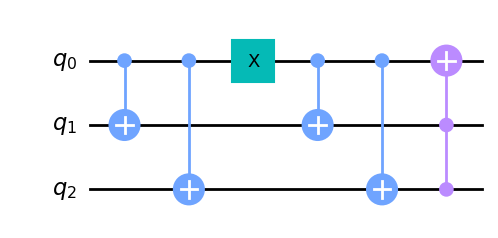

In [2]:
circ = AssertQuantumCircuit(3)
circ.cx(0,1)
circ.cx(0,2)
# circ.barrier()

#### insert_noise ####
# You can uncomment one of the following:
circ.x(0)
# circ.x(1)
# circ.x(2)
# circ.barrier()

circ.cx(0,1)
circ.cx(0,2)
circ.ccx(1,2,0)

circ.add_pre_condition("cond1", lambda pre_state: eq_state(pre_state, Zero), [1])
circ.add_pre_condition("cond2", lambda pre_state: eq_state(pre_state, Zero), [2])
circ.add_condition("cond3", lambda pre_state, post_state: eq_state(pre_state, post_state), [0])

print(circ.run(init_state=Zero^Zero^Plus))

circ.remove_assertions().draw("mpl")

In [3]:
%%timeit -n 1 -r 5
circ.run(init_state=Zero^Zero^Plus)

40.9 ms ± 5.23 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [4]:
print("#qubits=")
print(circ.num_qubits)
print()
print("#gates=")
print(sum(circ.remove_assertions().count_ops().values()))

#qubits=
3

#gates=
6
